>Importando librerías necesarias

In [1]:
import mysql.connector #Para concectar con la base de datos
import pandas as pd #Para trabajar con datos
#import statsmodels.api as sm 
import statsmodels.formula.api as smf #Para trabajar con modelos estadísticos
import matplotlib.pyplot as plt #Para graficar
import seaborn as sns #Para gráficos

>Extraer los datos

In [21]:
#crear conexión con mysql.connector
cnn = mysql.connector.connect(host="localhost", 
                            user="root", 
                            passwd="DB123", 
                            database="sati")

cur = cnn.cursor()
cur.execute("SELECT sati,edad,proy,tiem,ause,sanc,jefe,sueld,rota FROM encuesta")
datos = cur.fetchall()
#cnn.close()

#Agrupando los datos en un dataframe
dat = pd.DataFrame(datos, columns =['sati','edad','proy','tiem','ause','sanc','jefe','suel','rota'])
dat

,sati,edad,proy,tiem,ause,sanc,jefe,suel,rota
0,81.0,41.0,5.0,7.0,7.0,1.0,5.0,5000.0,5.0
1,89.0,43.0,6.0,8.0,1.0,2.0,5.0,4000.0,8.0
2,55.0,45.0,5.0,5.0,2.0,1.0,3.0,4000.0,6.0
3,21.0,NaN,3.0,1.0,10.0,4.0,3.0,2500.0,4.0
4,NaN,33.0,NaN,NaN,8.0,5.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
120,81.0,42.0,10.0,6.0,10.0,5.0,5.0,4000.0,4.0
121,46.0,31.0,5.0,3.0,6.0,0.0,2.0,2500.0,9.0
122,99.0,NaN,7.0,7.0,5.0,NaN,NaN,4000.0,4.0
123,NaN,NaN,5.0,7.0,6.0,2.0,2.0,5000.0,6.0


>Eliminando valores faltantes (NaN)

In [7]:
dat = dat.dropna().reset_index(drop=True)
dat

,sati,edad,proy,tiem,ause,sanc,jefe,suel,rota
0,81.0,41.0,5.0,7.0,7.0,1.0,5.0,5000.0,5.0
1,89.0,43.0,6.0,8.0,1.0,2.0,5.0,4000.0,8.0
2,55.0,45.0,5.0,5.0,2.0,1.0,3.0,4000.0,6.0
3,21.0,24.0,1.0,3.0,1.0,3.0,1.0,1500.0,6.0
4,71.0,35.0,7.0,5.0,4.0,5.0,4.0,4000.0,1.0
...,...,...,...,...,...,...,...,...,...
95,75.0,50.0,7.0,7.0,10.0,5.0,2.0,3000.0,3.0
96,73.0,29.0,5.0,7.0,8.0,5.0,1.0,4000.0,6.0
97,81.0,42.0,10.0,6.0,10.0,5.0,5.0,4000.0,4.0
98,46.0,31.0,5.0,3.0,6.0,0.0,2.0,2500.0,9.0


30 15 29 51


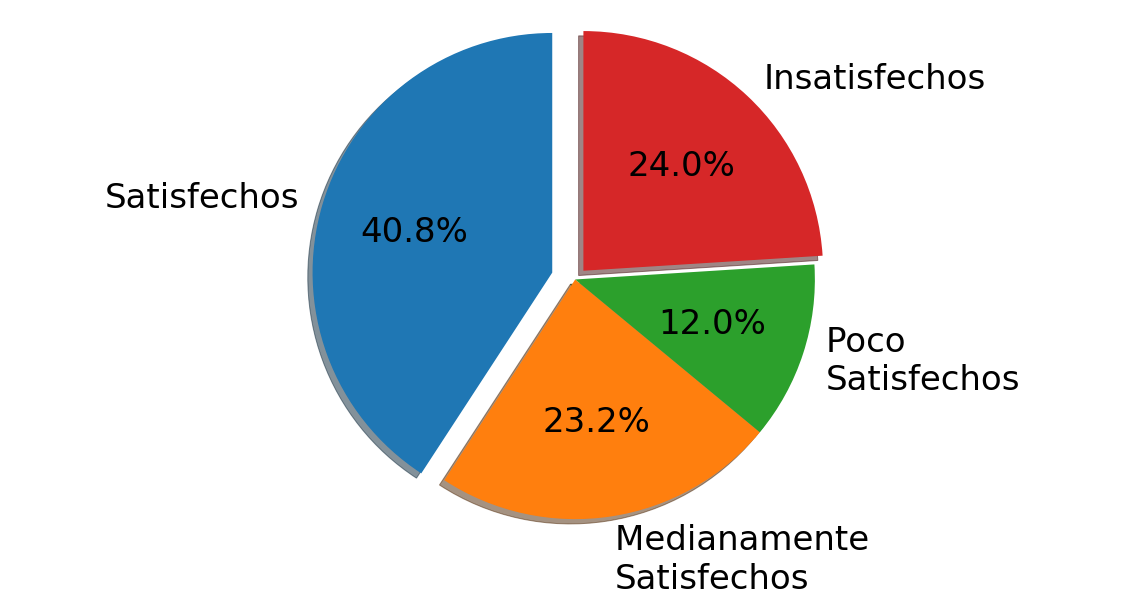

In [26]:
cir = list(dat.loc[:,"sati"])
ins = 0
poc = 0
med = 0
sat = 0
for i in cir:
    if i <= 40:
        ins += 1
    elif i>40 and i<=70:
        poc += 1
    elif i>70 and i<= 80:
        med += 1
    else: 
        sat += 1
print(ins, poc, med, sat)

labels = 'Satisfechos', ' \nMedianamente \nSatisfechos', 'Poco \nSatisfechos', 'Insatisfechos'
sizes = [sat, med, poc, ins]
explode = (0.1, 0, 0, 0.05)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
plt.rcParams['figure.figsize'] = [20, 10]
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 34})
ax1.axis('equal') 

plt.show()


>Graficando todas las variables vs la varaible de respuesta (Satisfacción)

          Sati
sati    1.000000
suel    0.820924
proy    0.803701
tiem    0.794578
edad    0.218713
ause    0.204701
sanc    0.177510
rota    0.157808
jefe   -0.021778
Name: sati, dtype: float64


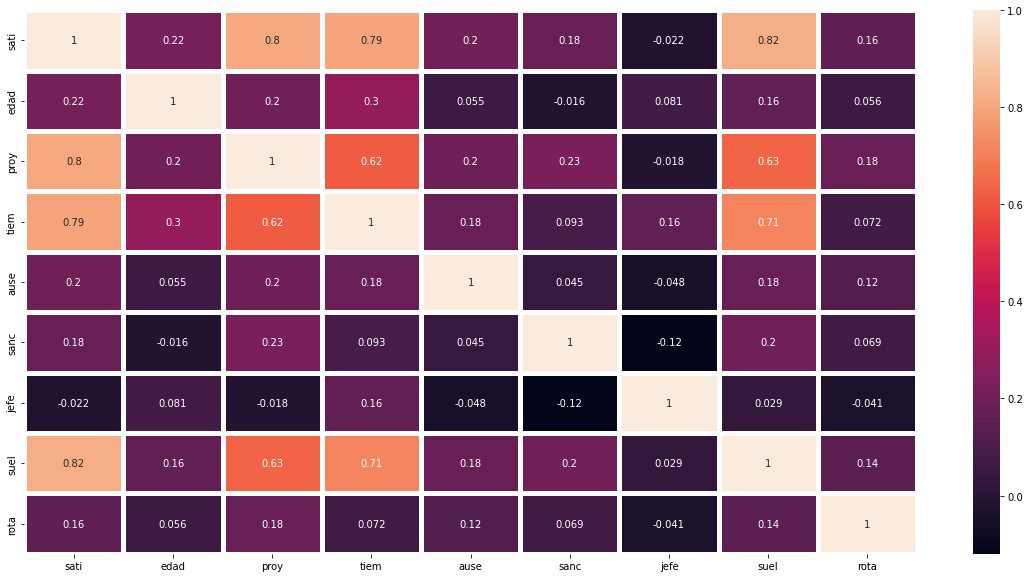

In [15]:
corr_df = dat.corr(method='pearson')
print("          Sati")
print(corr_df.sort_values('sati', ascending=False).iloc[:, 0])
plt.figure()
sns.heatmap(corr_df, annot=True, linewidths = 5)
plt.show()

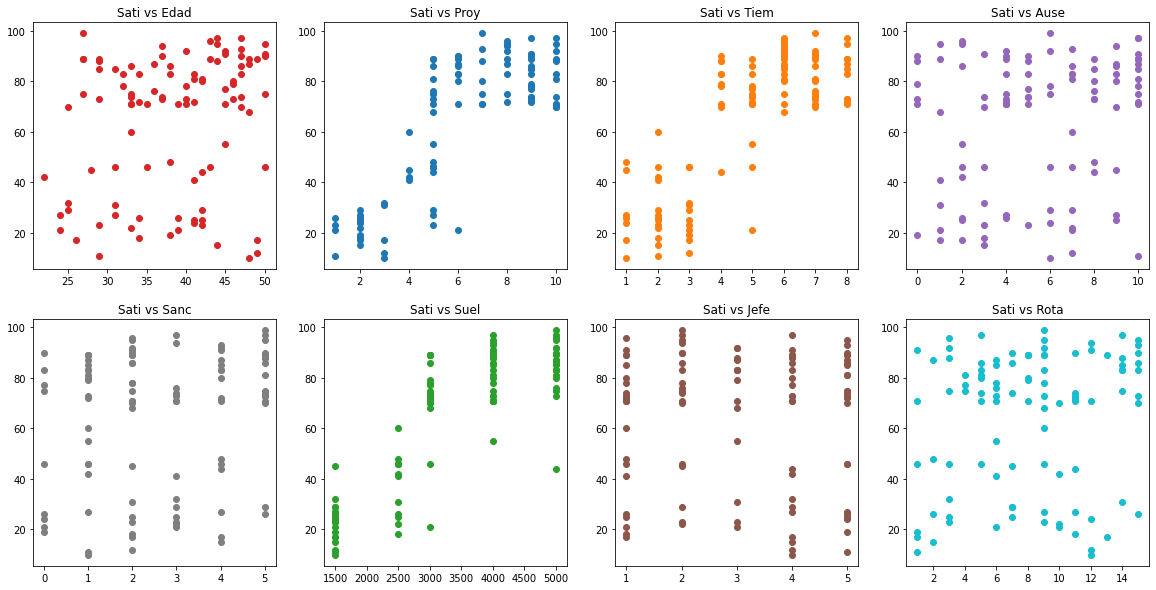

In [10]:
fig, axs = plt.subplots(2, 4)
plt.subplots_adjust(hspace=0.2)
plt.rcParams['figure.figsize'] = [20, 10]
#axs.set_ylim(ymin=0)
axs[0,0].plot(dat.loc[:,"edad"],dat.loc[:,"sati"],'tab:red',marker="o",linestyle='None')
axs[0,0].set_title('Sati vs Edad')
axs[0,1].plot(dat.loc[:,"proy"],dat.loc[:,"sati"],'tab:blue',marker="o",linestyle='None')
axs[0,1].set_title('Sati vs Proy')
axs[0,2].plot(dat.loc[:,"tiem"],dat.loc[:,"sati"],'tab:orange',marker="o",linestyle='None')
axs[0,2].set_title('Sati vs Tiem')
axs[0,3].plot(dat.loc[:,"ause"],dat.loc[:,"sati"],'tab:purple',marker="o",linestyle='None')
axs[0,3].set_title('Sati vs Ause')
axs[1,0].plot(dat.loc[:,"sanc"],dat.loc[:,"sati"],'tab:gray',marker="o",linestyle='None')
axs[1,0].set_title('Sati vs Sanc')
axs[1,1].plot(dat.loc[:,"suel"],dat.loc[:,"sati"],'tab:green',marker="o",linestyle='None')
axs[1,1].set_title('Sati vs Suel')
axs[1,2].plot(dat.loc[:,"jefe"],dat.loc[:,"sati"],'tab:brown',marker="o",linestyle='None')
axs[1,2].set_title('Sati vs Jefe')
axs[1,3].plot(dat.loc[:,"rota"],dat.loc[:,"sati"],'tab:cyan',marker="o",linestyle='None')
axs[1,3].set_title('Sati vs Rota')
plt.show()

In [11]:
reg = smf.ols("sati~ proy + tiem + suel",data=dat)
res = reg.fit()

a = list(res.params)
print("La ecuación es:")
print("Satisfacción = "+ str(round(a[0],3))+" + "+ str(round(a[1],3))+"*NúmeroDeProyectos + "
        +str(round(a[2],3))+"*TiempoEnLaEmpresa + "+str(round(a[3],3))+"*Sueldo")

res.summary()

La ecuación es:
Satisfacción = -5.086 + 3.872*NúmeroDeProyectos + 3.703*TiempoEnLaEmpresa + 0.008*Sueldo


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   sati   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     176.5
Date:                Tue, 16 Aug 2022   Prob (F-statistic):           6.14e-39
Time:                        12:21:33   Log-Likelihood:                -377.98
No. Observations:                 100   AIC:                             764.0
Df Residuals:                      96   BIC:                             774.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.0858      3.270     -1.555      0.123     -11.577       1.405
proy           3.8723      0.533      7.258      0.000       2.813       4.931
tiem           3.7035      0.755      4.906      0.000       2.205       5.202
suel           0.0081      0.001      5.920      0.000       0.005       0.011
==============================================================================
Omnibus:                        8.636   Durbin-Watson:                   2.311
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               10.366
Skew:                          -0.465   Prob(JB):                      0.00561
Kurtosis:                       4.274   Cond. No.                     1.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>Creando el modelo de regresión múltiple con las varibles que mostraban mayor correlación (proy, tiem, suel)

In [13]:
print(res.params[0]+res.params[1]*5+res.params[2]*7+res.params[3]*5000)

80.50980604033376


In [14]:
print(res.predict(dat))

0     80.509806
1     80.023549
2     65.040899
3     21.989812
4     72.785488
        ...    
95    72.130388
96    72.447803
97    88.105822
98    45.540991
99    22.327497
Length: 100, dtype: float64


<AxesSubplot:xlabel='tiem', ylabel='sati'>

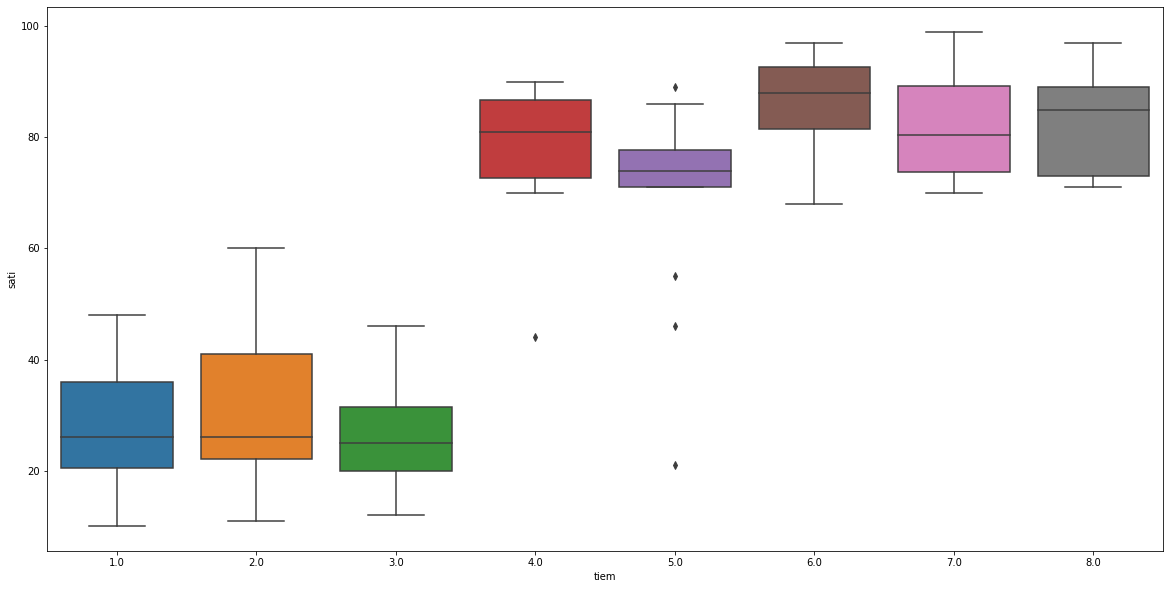

In [12]:
sns.boxplot( x=dat["tiem"], y=dat["sati"] )
#sns.boxplot( x=dat["proy"], y=dat["sati"] )


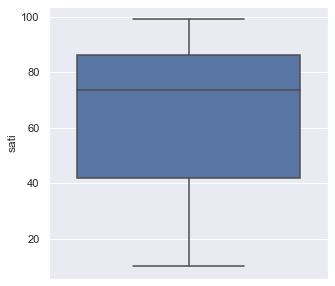

In [14]:
sns.boxplot( y=dat["sati"] )
sns.set(rc={'figure.figsize':(5,5)})

In [29]:
cur = cnn.cursor()
cur.execute("""SELECT nombre, sati, correo, numero 
                FROM encuesta 
                INNER JOIN trabajadores ON TRABAJADORES_ID = trabajadores.ID 
                WHERE sati <= 40""")
insat = cur.fetchall()
#cnn.close()

#Agrupando los datos en un dataframe
insat = pd.DataFrame(insat, columns =['Nombre','Satisfacción','Email','Celular'])
insat.head()

,Nombre,Satisfacción,Email,Celular
0,Alden Weaver,21,aldenweaver1551@entelgy.com,907515947
1,Hollee Combs,21,holleecombs478@entelgy.com,977232865
2,Xavier Stein,22,xavierstein@entelgy.com,995240878
3,Odessa Mathis,12,odessamathis4088@entelgy.com,945330377
4,Jasmine Brown,32,jasminebrown3893@entelgy.com,993767387


In [30]:
cnn.close()